In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
diabates = datasets.load_diabetes()

In [3]:
x_train,x_test, y_train, y_test = train_test_split(diabates.data,diabates.target, random_state=0)

In [4]:
X = diabates.data
Y = diabates.target

In [5]:
model =KNeighborsRegressor(n_neighbors=10)

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
cross_val_score(model, X,Y, cv=20 ,scoring ="neg_mean_squared_error")

array([-3638.09608696, -3477.78652174, -2571.33272727, -3362.85954545,
       -4926.82818182, -3206.47136364, -3862.90363636, -2739.51181818,
       -3286.46545455, -4137.58954545, -3692.85863636, -3893.84772727,
       -4174.85318182, -3654.00818182, -2523.64590909, -2058.01363636,
       -3700.51727273, -4414.285     , -3204.05      , -2245.77545455])

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
iris = datasets.load_iris()

In [10]:
model = KNeighborsClassifier()

In [11]:
cross_val_score(model, iris.data, iris.target, cv=5 )

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [12]:
from sklearn.model_selection import KFold
import numpy as np

In [13]:
X = np.array([['N','Y'],['Y','Y'],['N','Y'],['Y','Y'],['Y','Y'],['Y','Y']])

In [14]:
Y = np.array(['cat','dog','cat','dog','dog','dog'])

In [15]:
kf = KFold(2)

In [16]:
list(kf.split(X))

[(array([3, 4, 5]), array([0, 1, 2])), (array([0, 1, 2]), array([3, 4, 5]))]

In [17]:
for train_index, test_index in kf.split(X) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print('Train', train_index)
    print(x_train, '/' , y_train)
    print('Test', test_index)
    print(x_test, '/' , y_test)
    print('--------------------------------------')

Train [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
Test [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
--------------------------------------
Train [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
Test [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
--------------------------------------


In [18]:
from sklearn.model_selection import StratifiedGroupKFold

In [19]:
skf = StratifiedGroupKFold(2)

In [20]:
for train_index, test_index in kf.split(X, Y) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print('Train', train_index)
    print(x_train, '/' , y_train)
    print('Test', test_index)
    print(x_test, '/' , y_test)
    print('--------------------------------------')

Train [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
Test [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
--------------------------------------
Train [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
Test [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
--------------------------------------


--------------------------

In [21]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
lr = LogisticRegression()

In [23]:
diabets = datasets.load_diabetes()

In [29]:
scores = []
for _ in range(10) :
    x_train, x_test, y_train, y_test = \
    train_test_split(diabets.data, diabets.target, test_size=0.25)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    scores.append(score)
    #print(score)

In [30]:
df = pd.DataFrame({'RMSE' : np.sqrt(scores)})

In [31]:
df.T

,0,1,2,3,4,5,6,7,8,9
RMSE,76.196108,92.801736,91.442297,105.858183,93.125025,123.535712,93.419908,114.20978,102.099492,65.111201


In [32]:
import seaborn as sns

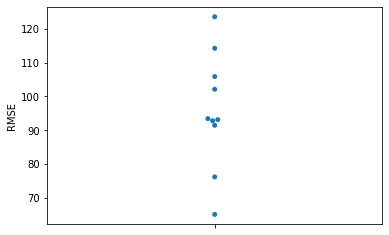

In [33]:
swarm = sns.swarmplot(y = 'RMSE', data = df)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X = scaler.fit_transform(diabets.data)

In [38]:
scores = []
for _ in range(10) :
    x_train, x_test, y_train, y_test = \
    train_test_split(X, diabets.target, test_size=0.25)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    scores.append(score)
    #print(score)

In [39]:
df2 = pd.DataFrame({'RMSE' : np.sqrt(scores)})

In [40]:
df2.T

,0,1,2,3,4,5,6,7,8,9
RMSE,79.087476,77.403762,81.110369,79.10792,74.821469,72.466084,82.087846,66.956958,86.057806,85.033062


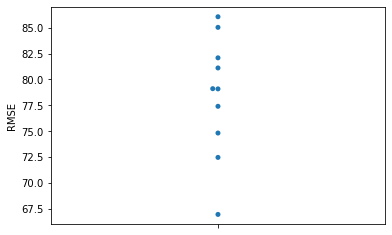

In [41]:
swarm = sns.swarmplot(y = 'RMSE', data = df2)

In [45]:
def tts_fit_score(model, X,Y, evaluation, test_size = 0.25) :
    x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size=test_size)
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    return score

In [46]:
lr = LinearRegression()
diabets = datasets.load_diabetes()

In [47]:
scores = [ tts_fit_score(lr, diabets.data, diabets.target, mean_squared_error )for _ in range(10)]

In [48]:
np.mean(np.sqrt(scores))

54.87750790112227

------------------------

In [49]:
from sklearn.model_selection import ShuffleSplit

In [54]:
ss = ShuffleSplit(test_size = 0.25, n_splits = 10 )

In [55]:
lr = LogisticRegression()
diabets = datasets.load_diabetes()

In [56]:
scores = cross_val_score(lr, diabets.data, diabets.target,
                        cv = ss, scoring= 'neg_mean_squared_error')

In [57]:
scores

array([ -7983.98198198,  -6377.37837838,  -6430.04504505,  -7919.24324324,
        -8939.77477477,  -8922.15315315,  -8926.61261261, -10892.91891892,
        -7261.97297297, -13000.93693694])

In [58]:
df3 = pd.DataFrame({'RMSE' : np.sqrt(-scores)})

In [59]:
df3.T

,0,1,2,3,4,5,6,7,8,9
RMSE,89.353131,79.85849,80.187562,88.99013,94.550382,94.45715,94.480753,104.369147,85.217211,114.021651


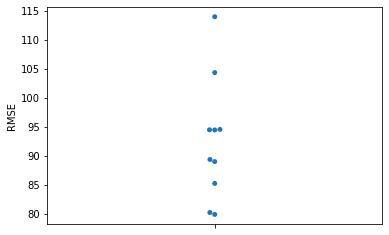

In [60]:
swarm = sns.swarmplot(y = 'RMSE', data = df3)

------------

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [65]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
Y = (10-1 / (X.ravel() + 0.1))  + np.random.randn(40) 

In [66]:
import matplotlib.pyplot as plt

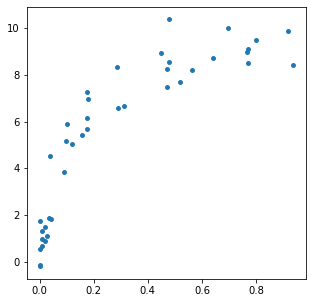

In [68]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(X.ravel(), Y, s=15);

In [85]:
X_test = np.linspace(-0.1,1.1,500).reshape(-1,1)

In [86]:
#2차원 
poly = PolynomialFeatures(2)

In [87]:
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

In [88]:
X[0]

array([0.17390735])

In [89]:
X_poly[0]

array([1.        , 0.17390735, 0.03024377])

In [90]:
#poly3 = PolynomialFeatures(3)

In [91]:
#X_poly3 = poly3.fit_transform(X)

In [92]:
#X_poly3[0]

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(X_poly, Y)

LinearRegression()

In [95]:
y_test = lr.predict(X_test_poly)

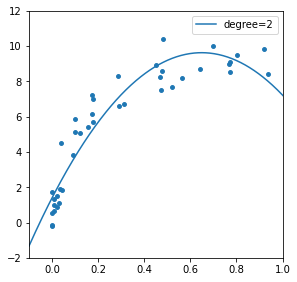

In [102]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,2)
ax.scatter(X.ravel(), Y , s=15)
ax.plot(X_test.ravel(), y_test, label = 'degree=2')
ax.set_xlim(-0.1,1.0)
ax.set_ylim(-2,12)
ax.legend(loc='best');

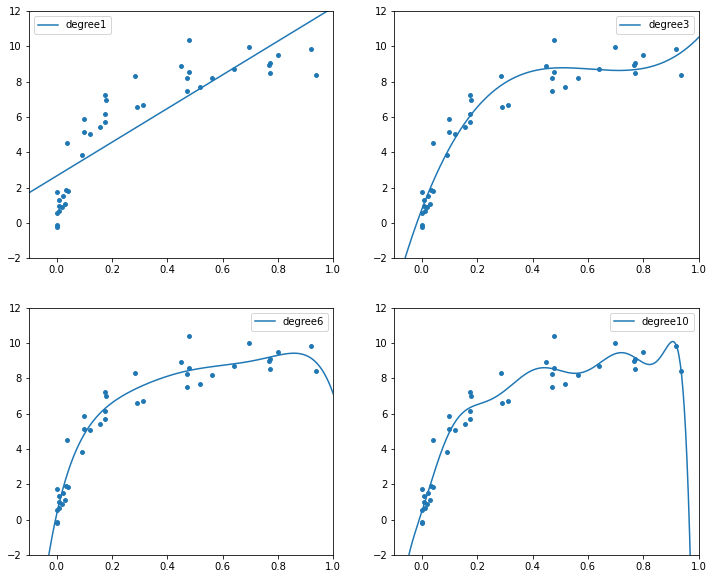

In [106]:
fig = plt.figure(figsize=(12,10))
X_test = np.linspace(-0.1,1.1,500).reshape(-1,1)
for i, degree in enumerate([1,3,6,10], start=1) :
    
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,Y).predict(X_test)
    
    ax = fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(), Y , s=15)
    ax.plot(X_test.ravel(), y_test, label = 'degree' + str(degree))
    ax.set_xlim(-0.1,1.0)
    ax.set_ylim(-2,12)
    ax.legend(loc='best');

In [107]:
from sklearn.model_selection import validation_curve

In [108]:
degree = np.arange(0,21)

In [109]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [111]:
train_score, test_score = validation_curve(model, X, Y, param_name= 'polynomialfeatures__degree',param_range=degree, cv=7)

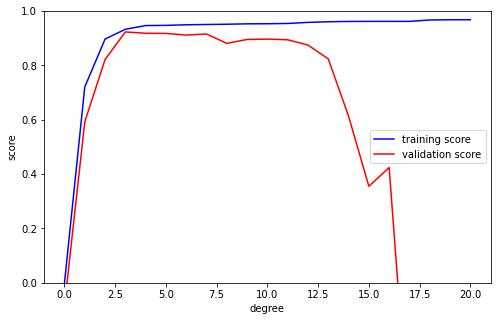

In [114]:
plt.figure(figsize=(8,5))
plt.plot(degree, np.median(train_score,1),'b-',label='training score')
plt.plot(degree, np.median(test_score,1),'r-',label='validation score')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc='best')

In [116]:
from sklearn.model_selection import learning_curve

In [118]:
np.linspace(0.1,1,25)

array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])

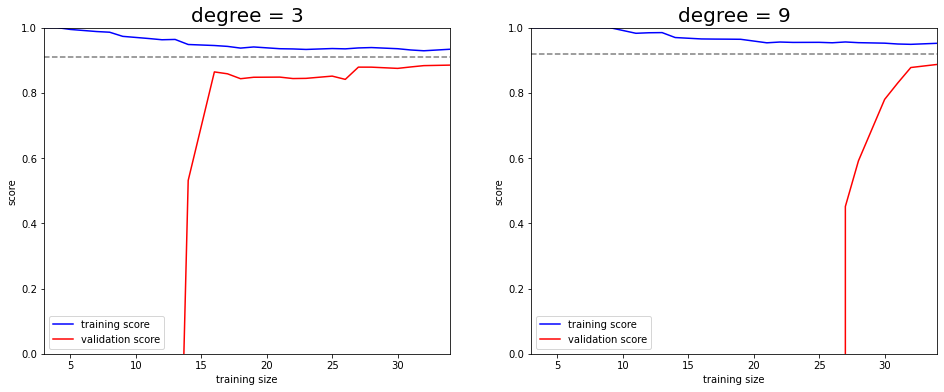

In [124]:
fig, ax = plt.subplots(1,2, figsize = (16,6))
for i , degree in enumerate([3,9]) :
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    n, train_lc, test_lc = learning_curve(model, X, Y, cv=7, train_sizes=np.linspace(0.1, 1,25) ) 
    ax[i].plot(n, np.mean(train_lc,1),'b-',label='training score')
    ax[i].plot(n, np.mean(test_lc,1),'r-',label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], test_lc[-1]]), n[0], n[-1], color = 'gray', linestyle='dashed')
    
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0,1), xlabel='training size', ylabel = 'score')
    ax[i].set_title('degree = {}'.format(degree), size=20)
    ax[i].legend(loc='best')